In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import numpy as np 
import cv2
import glob
import os
import matplotlib.pyplot as plt
import string
from mlxtend.plotting import plot_decision_regions
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils.multiclass import unique_labels
from sklearn import metrics
from sklearn.svm import SVC

dim = 150

In [0]:
import glob
import os
import pandas as pd

In [0]:
IMAGE_FOLDER_PATH="/content/gdrive/My Drive/dental/rvg"
FILE_NAMES=os.listdir(IMAGE_FOLDER_PATH)
WIDTH=150
HEIGHT=150

In [0]:
import numpy as np
import cv2 as cv



In [0]:
s=pd.read_csv("/content/gdrive/My Drive/dental/labels - Sheet1.csv")

In [0]:
target=s['normal']

In [0]:
targets=list()
full_paths=list()
i=0
for file_name in FILE_NAMES:
    full_path=os.path.join(IMAGE_FOLDER_PATH, file_name)
    full_paths.append(full_path)
    targets.append(str(target[i]))
    i=i+1

dataset=pd.DataFrame()
dataset['image_path']=full_paths
dataset['target']=targets

In [0]:
dataset.head(10)

,image_path,target
0,/content/gdrive/My Drive/dental/rvg/138.jpg,0
1,/content/gdrive/My Drive/dental/rvg/139.jpg,0
2,/content/gdrive/My Drive/dental/rvg/142.jpg,0
3,/content/gdrive/My Drive/dental/rvg/143.jpg,0
4,/content/gdrive/My Drive/dental/rvg/144.jpg,0
5,/content/gdrive/My Drive/dental/rvg/207.jpg,0
6,/content/gdrive/My Drive/dental/rvg/201.jpg,1
7,/content/gdrive/My Drive/dental/rvg/206.jpg,0
8,/content/gdrive/My Drive/dental/rvg/204.jpg,0
9,/content/gdrive/My Drive/dental/rvg/199.jpg,0


In [0]:
dataset_train, dataset_test=train_test_split(dataset,test_size=0.2,
                                                 random_state=42)

In [0]:
def genimg(dataset):
  images=[]
  labels=[]
  for i in dataset.index:
    image_path=dataset['image_path'][i]
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    image = cv2.resize(image, (dim, dim))
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    images.append(image)
    labels.append(dataset['target'][i])
  images=np.array(images)
  labels=np.array(labels)
  return images,labels


In [0]:
X_t, y_train =  genimg(dataset_train)
X_test, y_test = genimg(dataset_test)


In [0]:
y_train=[int(x) for x in y_train]
y_test=[int(x) for x in y_test]

In [0]:
scaler = StandardScaler()
X_train = scaler.fit_transform([i.flatten() for i in X_t])
X_test = scaler.fit_transform([i.flatten() for i in X_test])


In [0]:
def plot_image_grid(images, nb_rows, nb_cols, figsize=(15, 15)):
    assert len(images) == nb_rows*nb_cols, "Number of images should be the same as (nb_rows*nb_cols)"
    fig, axs = plt.subplots(nb_rows, nb_cols, figsize=figsize)
    
    n = 0
    for i in range(0, nb_rows):
        for j in range(0, nb_cols):
            axs[i, j].axis('off')
            axs[i, j].imshow(images[n])
            n += 1    

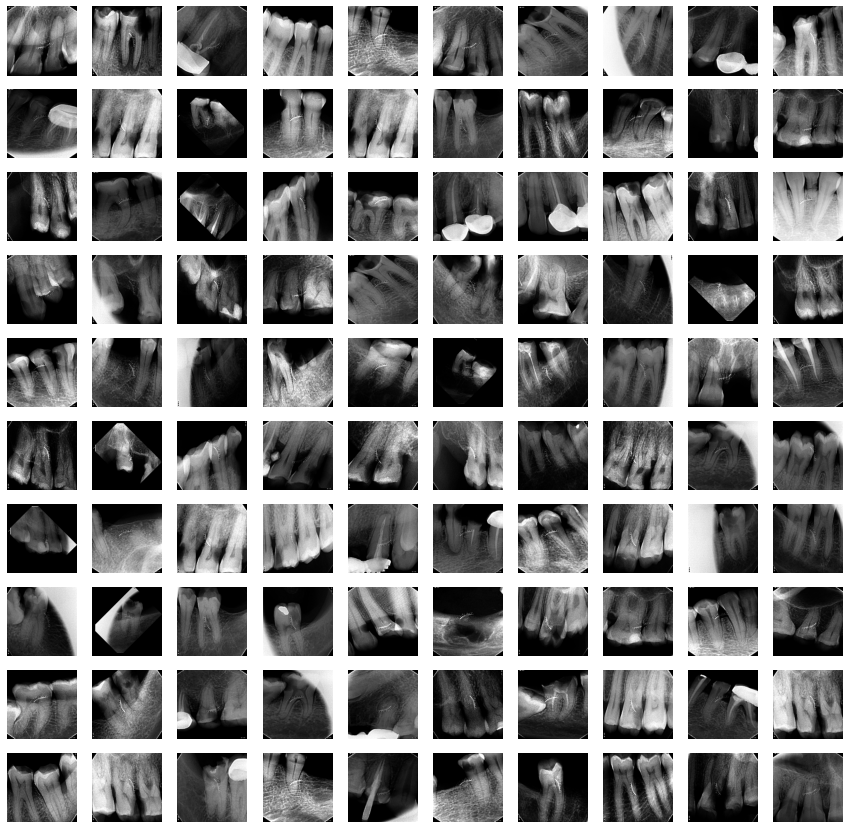

In [0]:
plot_image_grid(X_t[0:100], 10, 10)

In [0]:
len(X_t)

529

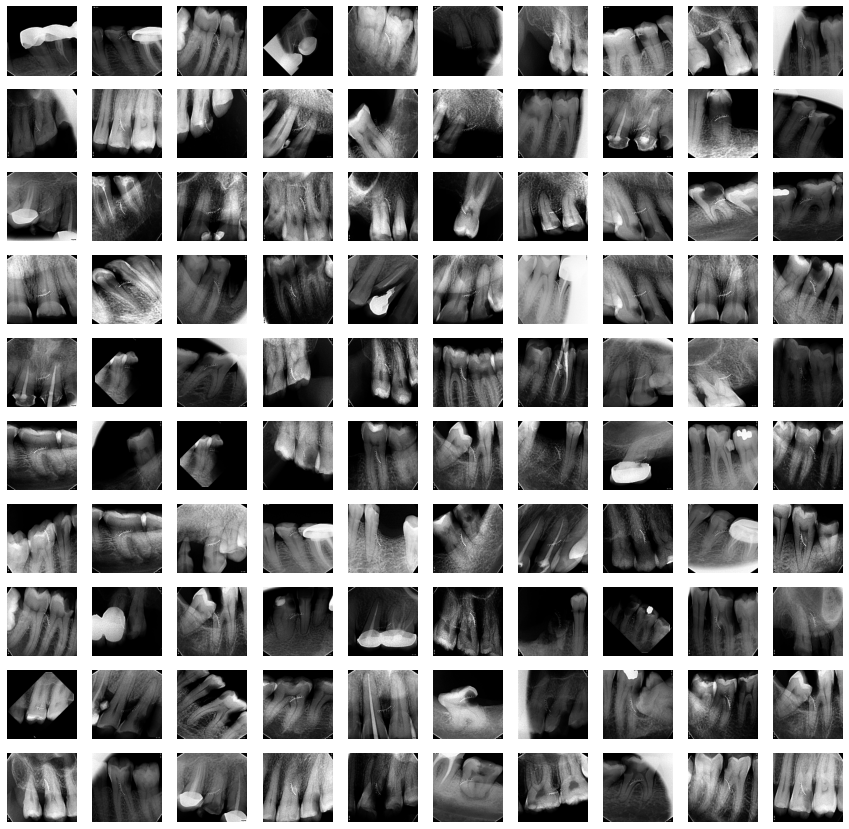

In [0]:
plot_image_grid(X_t[423:523], 10, 10)

In [0]:
fruits = ['Birads' , 'Normal'] 

In [0]:
def getClassNumber(y):
    v =[]
    i=0
    count = 0
    for index in y:
        if(index == i):
            count +=1
        else:
            v.append(count)
            count = 1
            i +=1
    v.append(count)        
    return v

def plotPrincipalComponents(X, dim):
    v = getClassNumber(y_train)
    colors = 'b', 'g', 'r', 'c', 'm', 'y', 'k', 'grey', 'orange', 'purple'
    markers = ['o', 'x' , 'v', 'd']
    tot = len(X)
    start = 0 
    if(dim == 2):
        for i,index in enumerate(v):
            end = start + index
            plt.scatter(X[start:end,0],X[start:end,1] , color=colors[i%len(colors)], marker=markers[i%len(markers)])
            start = end
        plt.xlabel('PC1')
        plt.ylabel('PC2')
    
    if(dim == 3):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        for i,index in enumerate(v):
            end = start + index
            ax.scatter(X[start:end,0], X[start:end,1], X[start:end,2], color=colors[i%len(colors)], marker=markers[i%len(markers)])
            start = end
        ax.set_xlabel('PC1')
        ax.set_ylabel('PC2')
        ax.set_zlabel('PC3')


    plt.legend(loc='lower left')
    plt.xticks()
    plt.yticks()
    plt.show()

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = metrics.confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = unique_labels(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=fruits, yticklabels=fruits,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return cm,ax

No handles with labels found to put in legend.


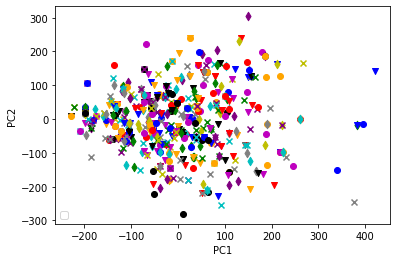

In [0]:
pca = PCA(n_components=2)
dataIn2D = pca.fit_transform(X_train)
plotPrincipalComponents(dataIn2D, 2)

In [0]:
svm = SVC(gamma='auto', kernel='linear', probability=True)
svm.fit(X_train, y_train) 
y_pred = svm.predict(X_test)


In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)


array([[53, 16],
       [49, 15]])

In [0]:
from sklearn.metrics import classification_report 
print(classification_report(y_test, y_pred)) 


              precision    recall  f1-score   support

           0       0.52      0.77      0.62        69
           1       0.48      0.23      0.32        64

    accuracy                           0.51       133
   macro avg       0.50      0.50      0.47       133
weighted avg       0.50      0.51      0.47       133



Accuracy with SVM: 51.13%
precision with SVM: 23.44%
recall with SVM: 48.39%
F1 score with SVM: 31.58%


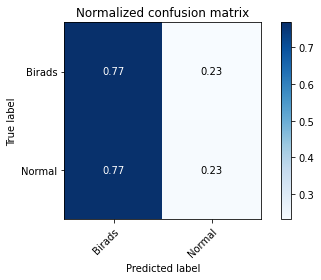

In [0]:

#Evaluation
accuracy = metrics.accuracy_score(y_pred, y_test) * 100
print("Accuracy with SVM: {0:.2f}%".format(accuracy))
precision = metrics.precision_score(y_pred, y_test) * 100
print("precision with SVM: {0:.2f}%".format(precision))
recall = metrics.recall_score(y_pred, y_test) * 100
print("recall with SVM: {0:.2f}%".format(recall))
f1 = metrics.f1_score(y_pred, y_test) * 100
print("F1 score with SVM: {0:.2f}%".format(f1))
cm , _ = plot_confusion_matrix(y_test, y_pred,classes=y_train, normalize=True, title='Normalized confusion matrix')
plt.show()


In [0]:

# calculate the FPR and TPR for all thresholds of the classification
probs = svm.predict_proba(X_test)
probs = probs[:, 1]
svm_fpr, svm_tpr, thresholds = metrics.roc_curve(y_test, probs)
svm_auc = metrics.roc_auc_score(y_test, probs)
svm_auc

0.5164175724637682

In [0]:
pca = PCA(n_components=2)
X_train2D = pca.fit_transform(X_train)
X_test2D = pca.fit_transform(X_test)

svm = SVC(gamma='auto', kernel='linear', probability=True)
svm.fit(X_train2D, y_train) 
test_predictions = svm.predict(X_test2D)
#precision = metrics.accuracy_score(test_predictions, y_test) * 100
#print("Accuracy with SVM considering only first 2PC: {0:.2f}%".format(precision))



Accuracy with SVM: 51.88%
precision with SVM: 0.00%
recall with SVM: 0.00%
F1 score with SVM: 0.00%


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


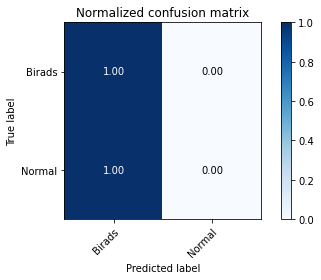

In [0]:

y_pred=test_predictions

accuracy = metrics.accuracy_score(y_pred, y_test) * 100
print("Accuracy with SVM: {0:.2f}%".format(accuracy))
precision = metrics.precision_score(y_pred, y_test) * 100
print("precision with SVM: {0:.2f}%".format(precision))
recall = metrics.recall_score(y_pred, y_test) * 100
print("recall with SVM: {0:.2f}%".format(recall))
f1 = metrics.f1_score(y_pred, y_test) * 100
print("F1 score with SVM: {0:.2f}%".format(f1))
cm , _ = plot_confusion_matrix(y_test, y_pred,classes=y_train, normalize=True, title='Normalized confusion matrix')
plt.show()

In [0]:
# calculate the FPR and TPR for all thresholds of the classification
probs = svm.predict_proba(X_test2D)
probs = probs[:, 1]
svm_fpr, svm_tpr, thresholds = metrics.roc_curve(y_test, probs)
svm_auc = metrics.roc_auc_score(y_test, probs)
svm_auc

0.43636775362318847

In [0]:
svm_with_kernel = SVC(gamma=0.01, kernel='rbf', probability=True)
svm_with_kernel.fit(X_train, y_train) 
y_pred = svm_with_kernel.predict(X_test)



Accuracy with SVM: 51.88%
precision with SVM: 0.00%
recall with SVM: 0.00%
F1 score with SVM: 0.00%


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


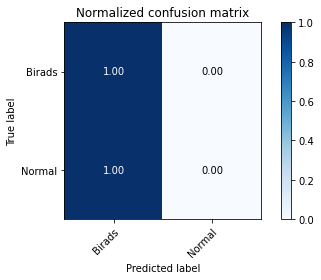

In [0]:


accuracy = metrics.accuracy_score(y_pred, y_test) * 100
print("Accuracy with SVM: {0:.2f}%".format(accuracy))
precision = metrics.precision_score(y_pred, y_test) * 100
print("precision with SVM: {0:.2f}%".format(precision))
recall = metrics.recall_score(y_pred, y_test) * 100
print("recall with SVM: {0:.2f}%".format(recall))
f1 = metrics.f1_score(y_pred, y_test) * 100
print("F1 score with SVM: {0:.2f}%".format(f1))
cm , _ = plot_confusion_matrix(y_test, y_pred,classes=y_train, normalize=True, title='Normalized confusion matrix')
plt.show()

In [0]:

# calculate the FPR and TPR for all thresholds of the classification
probs = svm_with_kernel.predict_proba(X_test)
probs = probs[:, 1]
svm_fpr, svm_tpr, thresholds = metrics.roc_curve(y_test, probs)
svm_auc = metrics.roc_auc_score(y_test, probs)
svm_auc

0.4500679347826087

In [0]:

#Plotting decision boundaries
plot_decision_regions(X_train, y_train, clf=svm_with_kernel, legend=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Kernel SVM Decision Boundaries')
plt.show()

Accuracy with SVM: 55.64%
precision with SVM: 15.62%
recall with SVM: 66.67%
F1 score with SVM: 25.32%


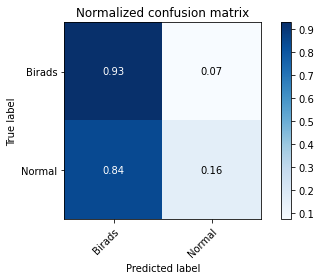

In [0]:
pca = PCA(n_components=2)
X_train2D = pca.fit_transform(X_train)
X_test2D = pca.fit_transform(X_test)


svm_with_kernel = SVC(gamma=0.01, kernel='rbf', probability=True)
svm_with_kernel.fit(X_train2D, y_train) 
y_pred = svm_with_kernel.predict(X_test2D)



accuracy = metrics.accuracy_score(y_pred, y_test) * 100
print("Accuracy with SVM: {0:.2f}%".format(accuracy))
precision = metrics.precision_score(y_pred, y_test) * 100
print("precision with SVM: {0:.2f}%".format(precision))
recall = metrics.recall_score(y_pred, y_test) * 100
print("recall with SVM: {0:.2f}%".format(recall))
f1 = metrics.f1_score(y_pred, y_test) * 100
print("F1 score with SVM: {0:.2f}%".format(f1))
cm , _ = plot_confusion_matrix(y_test, y_pred,classes=y_train, normalize=True, title='Normalized confusion matrix')
plt.show()

In [0]:

# calculate the FPR and TPR for all thresholds of the classification
probs = svm_with_kernel.predict_proba(X_test2D)
probs = probs[:, 1]
svm_fpr, svm_tpr, thresholds = metrics.roc_curve(y_test, probs)
svm_auc = metrics.roc_auc_score(y_test, probs)
svm_auc

0.4771286231884058

In [0]:

#Plotting decision boundaries
plot_decision_regions(X_train2D, y_train, clf=svm_with_kernel, legend=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Kernel SVM Decision Boundaries')
plt.show()

ValueError: ignored

In [0]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


Accuracy with SVM: 56.39%
precision with SVM: 12.50%
recall with SVM: 80.00%
F1 score with SVM: 21.62%


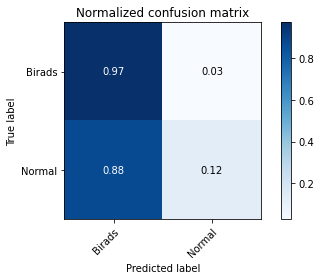

In [0]:
#Evaluation


accuracy = metrics.accuracy_score(y_pred, y_test) * 100
print("Accuracy with SVM: {0:.2f}%".format(accuracy))
precision = metrics.precision_score(y_pred, y_test) * 100
print("precision with SVM: {0:.2f}%".format(precision))
recall = metrics.recall_score(y_pred, y_test) * 100
print("recall with SVM: {0:.2f}%".format(recall))
f1 = metrics.f1_score(y_pred, y_test) * 100
print("F1 score with SVM: {0:.2f}%".format(f1))
cm , _ = plot_confusion_matrix(y_test, y_pred,classes=y_train, normalize=True, title='Normalized confusion matrix')
plt.show()



In [0]:

# calculate the FPR and TPR for all thresholds of the classification
probs = knn.predict_proba(X_test)
probs = probs[:, 1]
knn_fpr, knn_tpr, thresholds = metrics.roc_curve(y_test, probs)
knn_auc = metrics.roc_auc_score(y_test, probs)


In [0]:
knn_auc

0.5245697463768116

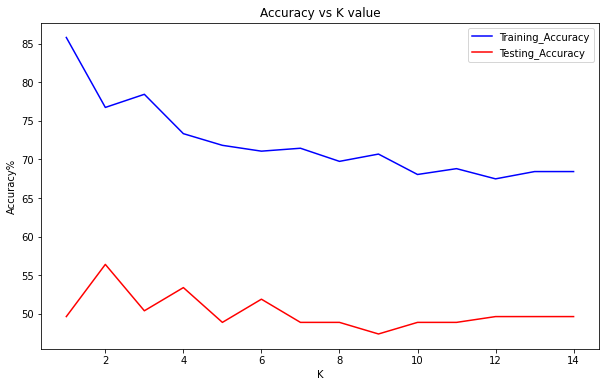

In [0]:
#CHANGING VALUES OF N
accuracy_train = []
accuracy_test = []

for i in range(1,15):   #check all possible values for 1 to 15
    k_nn = KNeighborsClassifier(n_neighbors=i)
    k_nn.fit(X_train,y_train)
    pred_i = k_nn.predict(X_test)
    accuracy_train.append(k_nn.score(X_train,y_train)*100)
    accuracy_test.append(k_nn.score(X_test,y_test)*100)
    
accuracy_train_array=np.asarray(accuracy_train)
accuracy_test_array=np.asarray(accuracy_test)
    
plt.figure(figsize=(10,6))
plt.plot(range(1,15),accuracy_train_array, label='Training_Accuracy', color='blue')
plt.plot(range(1,15),accuracy_test_array, label='Testing_Accuracy', color='red')
plt.legend()
plt.title('Accuracy vs K value')
plt.xlabel('K')
plt.ylabel('Accuracy%')

plt.show()

In [0]:
#K-NN + PCA
pca = PCA(n_components=2)
X_train2D = pca.fit_transform(X_train)
X_test2D = pca.fit_transform(X_test)
knn.fit(X_train2D, y_train)
y_pred = knn.predict(X_test2D)



Accuracy with SVM: 51.13%
precision with SVM: 10.94%
recall with SVM: 46.67%
F1 score with SVM: 17.72%


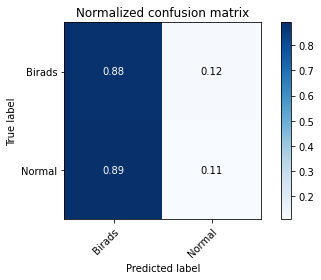

In [0]:

accuracy = metrics.accuracy_score(y_pred, y_test) * 100
print("Accuracy with SVM: {0:.2f}%".format(accuracy))
precision = metrics.precision_score(y_pred, y_test) * 100
print("precision with SVM: {0:.2f}%".format(precision))
recall = metrics.recall_score(y_pred, y_test) * 100
print("recall with SVM: {0:.2f}%".format(recall))
f1 = metrics.f1_score(y_pred, y_test) * 100
print("F1 score with SVM: {0:.2f}%".format(f1))
cm , _ = plot_confusion_matrix(y_test, y_pred,classes=y_train, normalize=True, title='Normalized confusion matrix')
plt.show()

In [0]:

# calculate the FPR and TPR for all thresholds of the classification
probs = knn.predict_proba(X_test2D)
probs = probs[:, 1]
svm_fpr, svm_tpr, thresholds = metrics.roc_curve(y_test, probs)
svm_auc = metrics.roc_auc_score(y_test, probs)
svm_auc

0.47203351449275366

In [0]:

#Plotting decision boundaries
plot_decision_regions(X_train2D, y_train, clf=knn, legend=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-NN Decision Boundaries')
plt.show()

ValueError: ignored

In [0]:
tree = DecisionTreeClassifier()
tree = tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)


Accuracy with SVM: 48.12%
precision with SVM: 17.19%
recall with SVM: 40.74%
F1 score with SVM: 24.18%


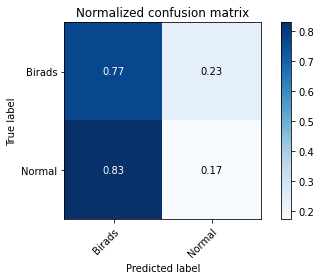

In [0]:

#Evaluation

accuracy = metrics.accuracy_score(y_pred, y_test) * 100
print("Accuracy with SVM: {0:.2f}%".format(accuracy))
precision = metrics.precision_score(y_pred, y_test) * 100
print("precision with SVM: {0:.2f}%".format(precision))
recall = metrics.recall_score(y_pred, y_test) * 100
print("recall with SVM: {0:.2f}%".format(recall))
f1 = metrics.f1_score(y_pred, y_test) * 100
print("F1 score with SVM: {0:.2f}%".format(f1))
cm , _ = plot_confusion_matrix(y_test, y_pred,classes=y_train, normalize=True, title='Normalized confusion matrix')
plt.show()


In [0]:

# calculate the FPR and TPR for all thresholds of the classification
probs = tree.predict_proba(X_test)
probs = probs[:, 1]
tree_fpr, tree_tpr, thresholds = metrics.roc_curve(y_test, probs)
tree_auc = metrics.roc_auc_score(y_test, probs)

In [0]:
tree_auc

0.4909420289855073

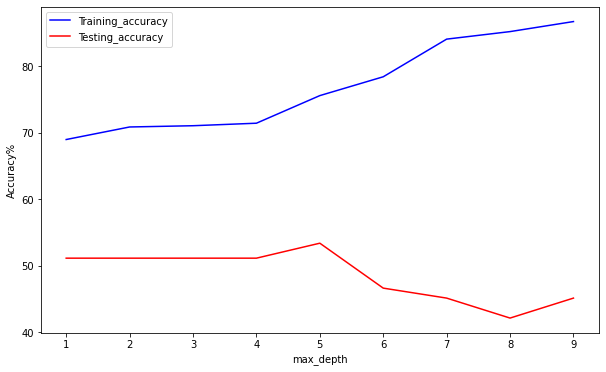

In [0]:
# CHANGING MAX_DEPTH
score_train=[]
score_test=[]

for i in range(1,10):
    dtree_md = DecisionTreeClassifier(max_depth=i)
    dtree_md.fit(X_train,y_train)
    
    score_train.append(dtree_md.score(X_train,y_train)*100)
    score_test.append(dtree_md.score(X_test,y_test)*100)
    
score_train_array=np.asarray(score_train)
score_test_array=np.asarray(score_test)
plt.figure(figsize=(10,6))
plt.plot(range(1,10),score_train_array,color='blue', label="Training_accuracy")
plt.plot(range(1,10),score_test_array,color='red',label="Testing_accuracy")

plt.legend()
plt.xlabel('max_depth')
plt.ylabel('Accuracy%')
plt.show()

In [0]:
#DECISION TREE + PCA
tree = tree.fit(X_train2D,y_train)
y_pred = tree.predict(X_test2D)


Accuracy with SVM: 48.87%
precision with SVM: 18.75%
recall with SVM: 42.86%
F1 score with SVM: 26.09%


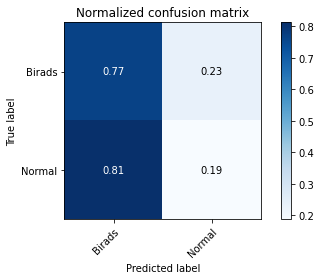

In [0]:

accuracy = metrics.accuracy_score(y_pred, y_test) * 100
print("Accuracy with SVM: {0:.2f}%".format(accuracy))
precision = metrics.precision_score(y_pred, y_test) * 100
print("precision with SVM: {0:.2f}%".format(precision))
recall = metrics.recall_score(y_pred, y_test) * 100
print("recall with SVM: {0:.2f}%".format(recall))
f1 = metrics.f1_score(y_pred, y_test) * 100
print("F1 score with SVM: {0:.2f}%".format(f1))
cm , _ = plot_confusion_matrix(y_test, y_pred,classes=y_train, normalize=True, title='Normalized confusion matrix')
plt.show()



In [0]:

# calculate the FPR and TPR for all thresholds of the classification
probs = tree.predict_proba(X_test2D)
probs = probs[:, 1]
tree_fpr, tree_tpr, thresholds = metrics.roc_curve(y_test, probs)
tree_auc = metrics.roc_auc_score(y_test, probs)
tree_auc

0.4814311594202898

In [0]:

#Plotting decision boundaries
plot_decision_regions(X_train2D, y_train, clf=tree, legend=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Decision Tree Decision Boundaries')
plt.show()

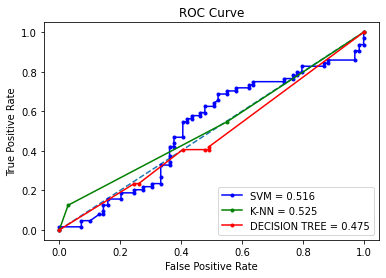

In [0]:
#ROC CURVE
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(svm_fpr, svm_tpr, 'b', marker='.', label = 'SVM = %0.3f' % svm_auc )
plt.plot(knn_fpr, knn_tpr, 'g', marker='.', label = 'K-NN = %0.3f' % knn_auc)
plt.plot(tree_fpr, tree_tpr, 'r', marker='.',label = 'DECISION TREE = %.3f' % tree_auc)
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [0]:
tree = DecisionTreeClassifier(max_depth=5)
tree = tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)


Accuracy with SVM: 52.63%
precision with SVM: 26.56%
recall with SVM: 51.52%
F1 score with SVM: 35.05%


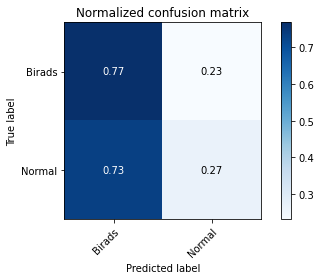

In [0]:

#Evaluation

accuracy = metrics.accuracy_score(y_pred, y_test) * 100
print("Accuracy with SVM: {0:.2f}%".format(accuracy))
precision = metrics.precision_score(y_pred, y_test) * 100
print("precision with SVM: {0:.2f}%".format(precision))
recall = metrics.recall_score(y_pred, y_test) * 100
print("recall with SVM: {0:.2f}%".format(recall))
f1 = metrics.f1_score(y_pred, y_test) * 100
print("F1 score with SVM: {0:.2f}%".format(f1))
cm , _ = plot_confusion_matrix(y_test, y_pred,classes=y_train, normalize=True, title='Normalized confusion matrix')
plt.show()


In [0]:

# calculate the FPR and TPR for all thresholds of the classification
probs = tree.predict_proba(X_test)
probs = probs[:, 1]
tree_fpr, tree_tpr, thresholds = metrics.roc_curve(y_test, probs)
tree_auc = metrics.roc_auc_score(y_test, probs)

In [0]:
tree_auc

0.5302309782608696